# Final Project

This project aims to use land surface reflectance data to simulate CO2 concentration.

__Dataset:__

feature dataset: MOD09CMG, grid data, with a spatial resolution of 0.05 degree. Band1, band2, band3, band4 and band7 are used in the subsequent computation.

See https://lpdaac.usgs.gov/products/mod09cmgv061/.

labelled dataset: OCO2, orbital data, with a spatial resoution of 2.25 km x 1.29 km.

See https://disc.gsfc.nasa.gov/datasets/OCO2_L2_Lite_FP_11.1r/summary?keywords=oco-2.

All the dataset used can be download from github.

__Data Preprocessing__: The OCO-2 data has been regridded to 0.05 degree, the same resolution with MOD09CMG data.

__Method__: Random Forest Method is used to simulate CO2 with surface reflectance data. Here we split global coverage dataset into 5 * 5 degree window and used Random Foresrt Method in this window.

This script __1.tutorial of the main process__ is a tutorial about the process, which helps to be familiar with the data and understand the process.

The script __2.function of the main process__ is a function which intergrates the important steps in *1.tutorial of the main process* and aims to reproduce the process quickly.

__Note__: Please change the file directory in the *load dataset* part.

# load dataset

In [54]:
# load some packages
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [119]:
# load labelled data
CO2 = np.loadtxt('/home/sh1776/miniforge3/Final_project/CO2_roi.csv',delimiter=',')
CO2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [55]:
# check the shape of the data
# the spatial resolution of CO2 data is 0.05 degree. There are 100 rows and 100 columns, so the area is 5*5 degree
CO2.shape

(100, 100)

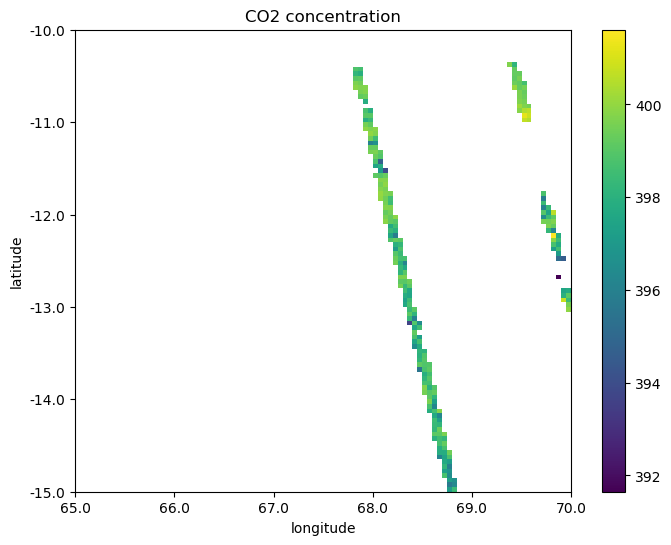

In [82]:
# view the dataset
# The CO2 data is not evenly distributed, which make it difficult to simulate.
CO2_plot = np.flip(CO2, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(CO2_plot)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('CO2 concentration')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage

In [96]:
# calculate the number of the CO2 observations
10000-np.isnan(CO2).sum()

270

In [83]:
# load MOD09CMG band1
band1 = np.loadtxt('/home/sh1776/miniforge3/Final_project/band1_roi.csv',delimiter=',') 
band1 # view the dataset

array([[ 0.0055,  0.0065,  0.033 , ...,  0.0645,  0.0511,  0.    ],
       [ 0.001 ,  0.0321,  0.0993, ...,  0.0424,  0.0264,  0.0157],
       [ 0.0049, -0.0008,  0.0263, ...,  0.0541,  0.0561,  0.047 ],
       ...,
       [ 0.0428,  0.075 ,  0.0385, ...,  0.0674,  0.0345,  0.0262],
       [ 0.0781,  0.0588,  0.0297, ...,  0.0249,  0.0059,  0.0111],
       [ 0.1254,  0.0575,  0.0171, ...,  0.0175,  0.0163,  0.016 ]])

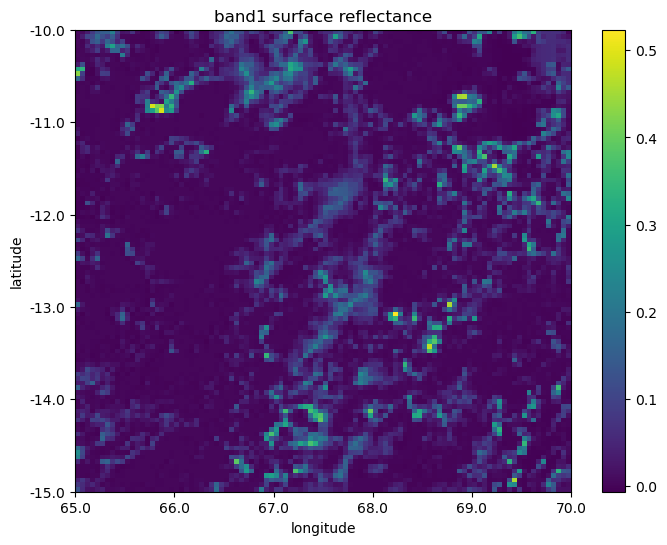

In [84]:
# view the dataset
band1_plot = np.flip(band1, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(band1_plot)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('band1 surface reflectance')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage

In [85]:
# load MOD09CMG band2
band2 = np.loadtxt('/home/sh1776/miniforge3/Final_project/band2_roi.csv',delimiter=',')
band2 # view the dataset

array([[ 0.0028,  0.0038,  0.0296, ...,  0.0637,  0.0504,  0.0027],
       [-0.001 ,  0.032 ,  0.0955, ...,  0.0423,  0.0275,  0.0173],
       [ 0.0033, -0.0022,  0.0248, ...,  0.0534,  0.0557,  0.0472],
       ...,
       [ 0.041 ,  0.0745,  0.039 , ...,  0.0672,  0.0347,  0.0271],
       [ 0.0765,  0.058 ,  0.0293, ...,  0.0264,  0.0088,  0.0136],
       [ 0.1244,  0.0568,  0.0185, ...,  0.0206,  0.0182,  0.0178]])

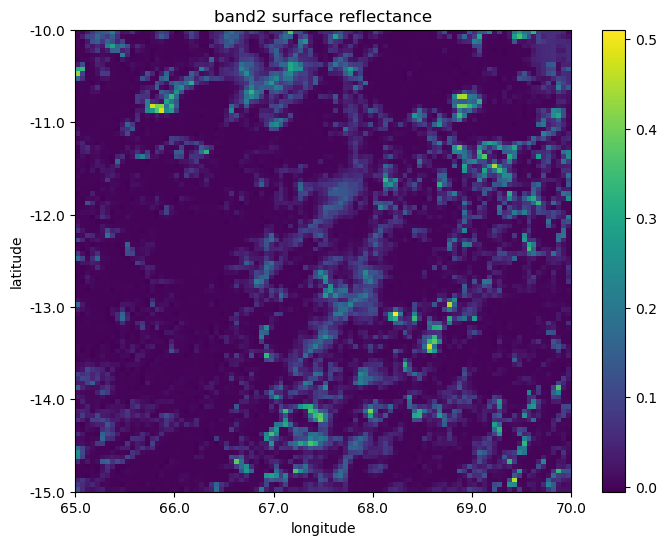

In [87]:
# view the dataset
band2_plot = np.flip(band2, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(band2_plot)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('band2 surface reflectance')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage

In [88]:
# load MOD09CMG band3
band3 = np.loadtxt('/home/sh1776/miniforge3/Final_project/band3_roi.csv',delimiter=',')
band3 # view the dataset

array([[0.0392, 0.0444, 0.0638, ..., 0.0874, 0.0747, 0.018 ],
       [0.0342, 0.0566, 0.1161, ..., 0.0635, 0.0483, 0.0396],
       [0.0356, 0.0299, 0.0615, ..., 0.076 , 0.0779, 0.0684],
       ...,
       [0.0844, 0.1015, 0.0643, ..., 0.0953, 0.0643, 0.0563],
       [0.0958, 0.0729, 0.0543, ..., 0.0516, 0.0314, 0.0396],
       [0.1887, 0.075 , 0.0267, ..., 0.0423, 0.0435, 0.0436]])

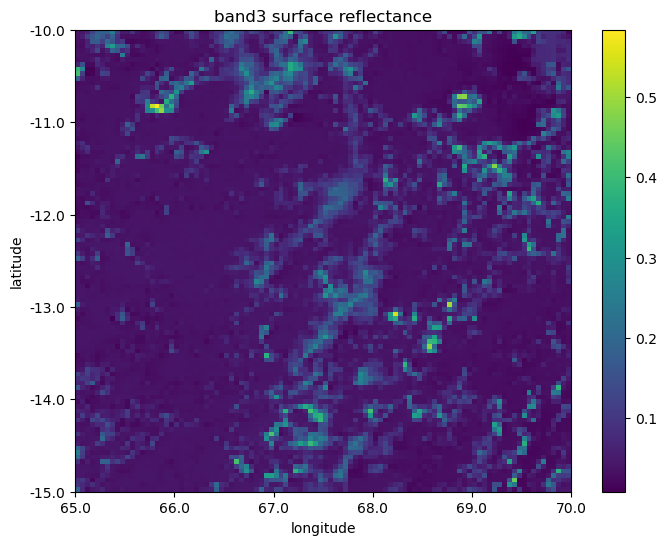

In [90]:
# view the dataset
band3_plot = np.flip(band3, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(band3_plot)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('band3 surface reflectance')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage# view the dataset

In [91]:
# load MOD09CMG band4
band4 = np.loadtxt('/home/sh1776/miniforge3/Final_project/band4_roi.csv',delimiter=',')
band4 # view the dataset

array([[0.0153, 0.0212, 0.041 , ..., 0.0697, 0.0563, 0.0025],
       [0.0108, 0.0394, 0.0969, ..., 0.0463, 0.0318, 0.0231],
       [0.0138, 0.0077, 0.0403, ..., 0.0588, 0.0605, 0.0512],
       ...,
       [0.0608, 0.0818, 0.0442, ..., 0.0716, 0.0397, 0.0323],
       [0.0753, 0.0496, 0.03  , ..., 0.0285, 0.0098, 0.0177],
       [0.1781, 0.0566, 0.0071, ..., 0.0214, 0.0203, 0.0204]])

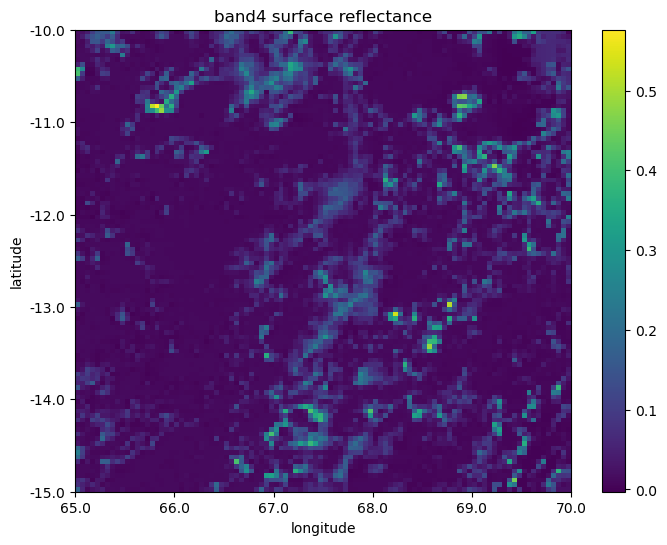

In [92]:
# view the dataset
band4_plot = np.flip(band4, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(band4_plot)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('band4 surface reflectance')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage# view the dataset

In [93]:
# load MOD09CMG band7
band7 = np.loadtxt('/home/sh1776/miniforge3/Final_project/band7_roi.csv',delimiter=',')
band7 # view the dataset

array([[0.0075, 0.0159, 0.0192, ..., 0.055 , 0.0486, 0.03  ],
       [0.0072, 0.0307, 0.0386, ..., 0.0437, 0.0413, 0.0367],
       [0.0159, 0.0122, 0.0464, ..., 0.0455, 0.0473, 0.0453],
       ...,
       [0.0293, 0.0433, 0.0361, ..., 0.0631, 0.0475, 0.0435],
       [0.0518, 0.0415, 0.0308, ..., 0.0444, 0.0379, 0.0407],
       [0.0526, 0.0376, 0.0256, ..., 0.0453, 0.0416, 0.0423]])

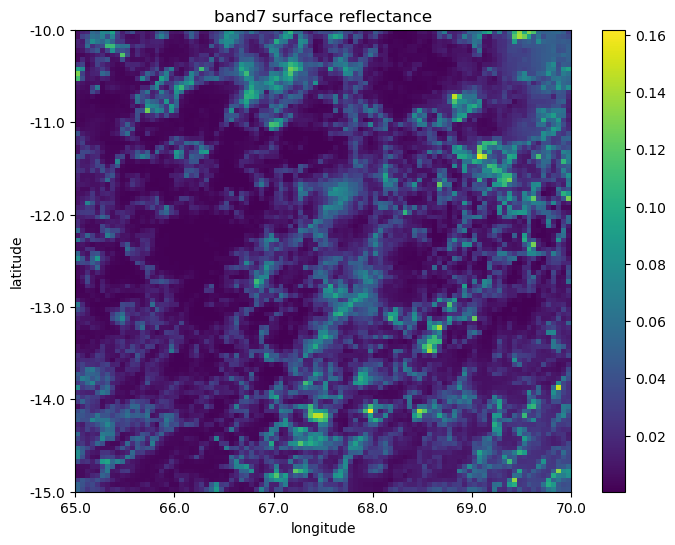

In [94]:
# view the dataset
band7_plot = np.flip(band7, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(band7_plot)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('band7 surface reflectance')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage# view the dataset

## data preprocessing

In [97]:
CO2_mask = np.isnan(CO2)
target_index = np.where(~CO2_mask) # get the index of the CO2 concentration in this image
target_value = CO2[~CO2_mask] # get the valid value of CO2 concentration
# predict_index = np.where(CO2_mask) # get the index of the region where we have

In [98]:
target_value.size # check the number of the valid value of CO2 concentration

270

In [109]:
predict_band1 = band1.reshape(10000)
predict_band2 = band2.reshape(10000)
predict_band3 = band3.reshape(10000)
predict_band4 = band4.reshape(10000)
predict_band7 = band7.reshape(10000)
predict_features = np.transpose(np.vstack((predict_band1,predict_band2,predict_band3,predict_band4,
                                           predict_band7)))
all_label = CO2.reshape(10000)
all_feature = predict_features[~np.isnan(all_label),:]
all_label = all_label[~np.isnan(all_label)]

In [104]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(all_feature, all_label, test_size = 0.3, random_state=2) 
# test_size = 0.3: 70% for training, 30% for verifying.

In [105]:
train_features.shape

(189, 5)

In [106]:
train_labels.shape

(189,)

In [107]:
test_features.shape

(81, 5)

In [108]:
test_labels.shape

(81,)

## Random Forest method

In [110]:
# build the model
reg_rf = RandomForestRegressor(n_estimators = 1000,random_state = 42)
reg_rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

### model accuracy

In [111]:
# calculate RMSE as a measure of model accuracy
RMSE_train=np.sqrt(np.square(reg_rf.predict(train_features)-train_labels).sum()/test_labels.shape[0])
RMSE_train

0.7033582560633512

In [112]:
# calculate RMSE as a measure of model accuracy
RMSE_test=np.sqrt(np.square(reg_rf.predict(test_features)-test_labels).sum()/test_labels.shape[0])
RMSE_test

1.5253370408946911

### model prediction

In [115]:
# predict CO2 concentration in this moving window
predict_CO2 = reg_rf.predict(predict_features)

In [117]:
# print the value of the predicted region
predict_CO2.shape

(10000,)

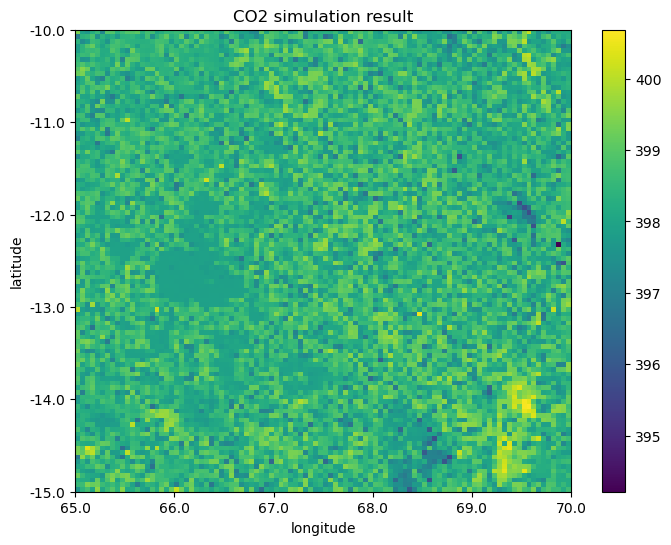

In [118]:
predict_CO2 = predict_CO2.reshape(100,100)

# view the dataset
predict_CO2_plot = np.flip(predict_CO2, axis=0) 
# The step is to inverse the row of the dataset for plot. If we don't do that, the first row (north) will be on the bottom,
# while the last rown (south) will be on the top.

fig, ax =  plt.subplots(figsize=(8,6))
meshplot = ax.pcolormesh(predict_CO2)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('CO2 simulation result')
fig.colorbar(meshplot) # add color bar
ax.set_xticks(np.arange(0,101,20),np.arange(-180+4900*0.05,-180+5000*0.05+1)) # select the 4900:5000 column from global coverage
ax.set_yticks(np.arange(0,101,20),np.arange(90-2100*0.05,90-2000*0.05+1)) # select the 2000:2100 column from global coverage# view the dataset